### 라이브러리 선언

In [1]:
#%matplotlib notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

### CSV 열기

In [2]:
data = pd.read_csv('data/convenient_store.csv')
data.head(8)

,area,company,hourly_wage,area1,area2,outlier,name
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25
5,구로구 구로동,gs25구로동양점,6000,구로구,구로동,0,gs25
6,구로구 구로동,gs25구로동양점,5580,구로구,구로동,0,gs25
7,동대문구 장안동,gs25장안중앙점,5600,동대문구,장안동,0,gs25


### 기초 통계 확인

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
area           177 non-null object
company        177 non-null object
hourly_wage    177 non-null int64
area1          177 non-null object
area2          177 non-null object
outlier        177 non-null int64
name           177 non-null object
dtypes: int64(2), object(5)
memory usage: 9.8+ KB


In [71]:
data.describe()

,hourly_wage,outlier
count,177.000000,177.0
mean,5787.627119,0.0
std,352.318646,0.0
min,5580.000000,0.0
25%,5580.000000,0.0
50%,5600.000000,0.0
75%,6000.000000,0.0
max,7500.000000,0.0


In [72]:
data.area.describe()

count         177
unique        117
top       강남구 논현동
freq            7
Name: area, dtype: object

### 데이터 필터링

In [73]:
high_wage = data[data.hourly_wage >= 6000]
high_wage.head()

,area,company,hourly_wage,area1,area2,outlier,name
5,구로구 구로동,gs25구로동양점,6000,구로구,구로동,0,gs25
9,성동구 금호동4,gs25 서울숲푸르지오점,6000,성동구,금호동4,0,gs25
13,영등포구 영등포동,gs25,6300,영등포구,영등포동,0,gs25
18,강남구 논현동,세븐일레븐 논현11호점,6200,강남구,논현동,0,7/11
27,강남구 대치동,세븐일레븐 대치3호점,6000,강남구,대치동,0,7/11


In [74]:
high_wage.sort_values(by='hourly_wage', ascending=0).head(10)

,area,company,hourly_wage,area1,area2,outlier,name
173,용산구 이태원동,CU 이태원프리덤점,7500,용산구,이태원동,0,CU
29,강남구 논현동,세븐일레븐편의점,7500,강남구,논현동,0,7/11
160,서대문구 신촌동,BGF Retail CU 신촌세브란스병원점,6900,서대문구,신촌동,0,CU
135,중구 명동2가,세븐일레븐,6690,중구,명동2가,0,7/11
172,용산구 한남동,CU 한남리첸시아점,6600,용산구,한남동,0,CU
37,강서구 등촌동,세븐일레븐 서울호서대점,6600,강서구,등촌동,0,7/11
161,서대문구 현저동,CU 독립문극동점,6500,서대문구,현저동,0,CU
89,성동구 사근동,세븐일레븐 한양대학교병원점,6500,성동구,사근동,0,7/11
72,마포구 동교동,세븐일레븐 마포홍익점,6500,마포구,동교동,0,7/11
30,강남구 청담동,세븐일레븐 청담그린점,6500,강남구,청담동,0,7/11


In [75]:
b = data[(data.hourly_wage >= 6000) & (data.area1 == '마포구')]
b

,area,company,hourly_wage,area1,area2,outlier,name
66,마포구 성산2동,세븐일레븐 마포 성산대로점,6000,마포구,성산2동,0,7/11
68,마포구 서교동,세븐일레븐 홍대클럽점,6000,마포구,서교동,0,7/11
72,마포구 동교동,세븐일레븐 마포홍익점,6500,마포구,동교동,0,7/11


In [76]:
cu = data[data.company.str.contains('CU')]
cu.head()

,area,company,hourly_wage,area1,area2,outlier,name
141,강남구 논현동,CU 논현힐탑점,5600,강남구,논현동,0,CU
142,강남구 논현동,CU논현한미점,6000,강남구,논현동,0,CU
143,강남구 신사동,CU 로데오점,6100,강남구,신사동,0,CU
144,강남구 대치4동,CU 대치본점,6000,강남구,대치4동,0,CU
145,강남구 논현1동,CUBE pc방,6500,강남구,논현1동,0,CU


In [77]:
cu = data[data.company.str.upper().str.contains('PC방')]
cu.head()

,area,company,hourly_wage,area1,area2,outlier,name
145,강남구 논현1동,CUBE pc방,6500,강남구,논현1동,0,CU


In [78]:
# 컬럼 접근시 data.company는 되지만, 컬럼 생성시엔 data[''] 만 가능하다.
data['seoul'] = 'in seoul'
data.head()

,area,company,hourly_wage,area1,area2,outlier,name,seoul
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25,in seoul
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25,in seoul
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25,in seoul
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25,in seoul
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25,in seoul


In [79]:
data['more_than_6000'] = data.hourly_wage > 6000
data.head()

,area,company,hourly_wage,area1,area2,outlier,name,seoul,more_than_6000
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25,in seoul,False
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25,in seoul,False
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25,in seoul,False
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25,in seoul,False
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25,in seoul,False


In [80]:
data[data.more_than_6000 == True].describe()

,hourly_wage,outlier
count,25.000000,25.0
mean,6518.000000,0.0
std,343.923441,0.0
min,6100.000000,0.0
25%,6300.000000,0.0
50%,6500.000000,0.0
75%,6500.000000,0.0
max,7500.000000,0.0


In [81]:
def more_than_6000(x):
    if x > 6000:
        return 'A Group'
    else:
        return 'B Group'

In [82]:
data['more_than_6000_2'] = data.hourly_wage.map(lambda x : more_than_6000(x))
data.head(4)

,area,company,hourly_wage,area1,area2,outlier,name,seoul,more_than_6000,more_than_6000_2
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25,in seoul,False,B Group
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25,in seoul,False,B Group
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25,in seoul,False,B Group
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25,in seoul,False,B Group


In [83]:
data2 = data[data.more_than_6000 == True][['area1','hourly_wage']]
data2 = data2.sort_values(by='hourly_wage', ascending=0)
data2

,area1,hourly_wage
173,용산구,7500
29,강남구,7500
160,서대문구,6900
135,중구,6690
37,강서구,6600
172,용산구,6600
30,강남구,6500
53,구로구,6500
60,도봉구,6500
161,서대문구,6500


In [84]:
data2.to_csv('data/data2.csv', index=False)

### 그래프로 데이터 그려보기

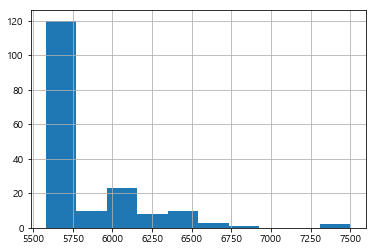

In [85]:
data.hourly_wage.hist(bins=10)
plt.show()

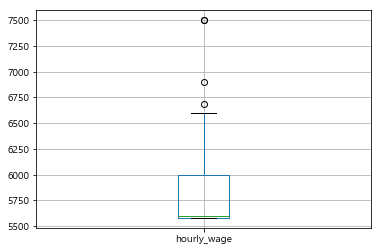

In [86]:
data.boxplot(column='hourly_wage', return_type='dict')
plt.show()

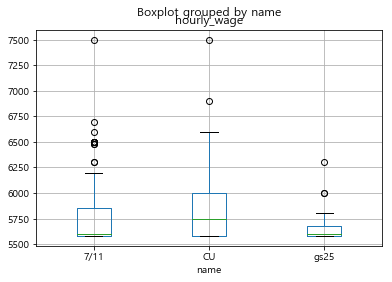

In [87]:
data.boxplot(column='hourly_wage', by='name')
plt.show()

In [88]:
font_name = matplotlib.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family=font_name)
print(font_name) #Malgun Gothic

Malgun Gothic


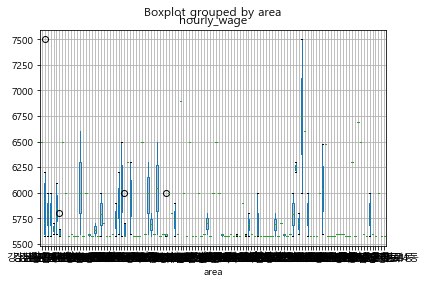

In [89]:
data.boxplot(column='hourly_wage', by='area')
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 25 Text xticklabel objects>)

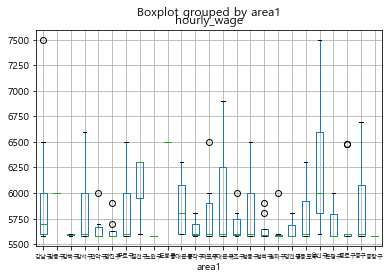

In [90]:
# 지역구별 박스플롯
data.boxplot(column='hourly_wage', by='area1')
plt.xticks(fontsize=6) #폰트 사이즈 설정

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 25 Text yticklabel objects>)

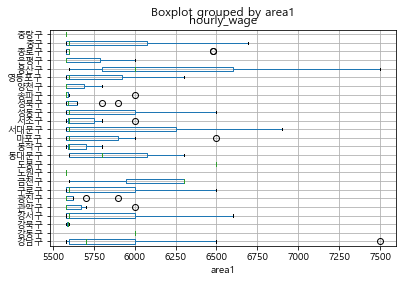

In [91]:
# 지역구별 박스플롯
data.boxplot(column='hourly_wage', by='area1', vert=False)
plt.yticks(fontsize=9) #폰트 사이즈 설정